# Descrição da Tarefa

## Sprint 3:

Desafio 01 - 2/2:

Continuação da Sprint anterior. Agora deve-se efetuar os seguinte passos:
1. Selecionar e avaliar pelo menos 1 modelo.
2. Realizar o Fine-Tuning do modelo.
3. Apresentar resultados.

#  Importando DataSet

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))

# Exploração e Análise dos dados

## Descrição do Data Set

In [ ]:
df.shape

(150, 6)

150 observações. 6 variáveis

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Tipos de dados das colunas/variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Não possui valores nulos;

Id possui valores inteiros;

Species são do tipo *object*;

As demais variáveis são floats.





##Entendendo do que se trata as informações do banco de dados

A coluna **IDs** de contas são a **identificação das observações**.

A coluna **Species** parece ser a variável de resposta/*target*.

As demais parecem ser as *feature* características:

* **SepalLengthCm** -> Comprimento da Sépala em cm;
* **SepalWidthCm**  -> Largura da Sépala em cm;
* **PetalLenghtCm** -> Comprimento da Pétala em cm;
* **PetalWidthCm** -> Largura da Pétala em cm;


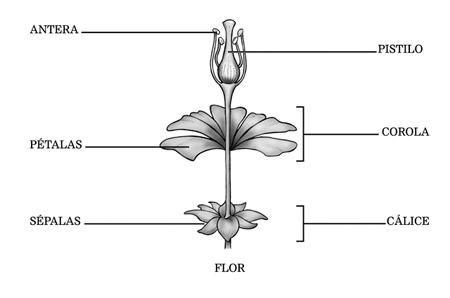

Figura 1 - Sépala x Pétala

## Verificando a qualidade dos dados

In [ ]:
# A função pandas .nunique() retorna o número de elementos únicos no objeto.

df['Id'].nunique()

150

Comparando o número de observações obtido anteriormente (.shape) com o obtido na função acima vemos que o Id é um número exclusivo.

In [ ]:
# Entendendo as variáveis.
# A função pandas .nunique() retornará o número de elementos únicos no objeto.

df['Species'].nunique()

3

Vemos que a variável **Specie** contém apenas 3 valores. Então, provável que está variável seja o *Label*

In [ ]:
# armazene as contagens de valores em uma variável definida como species_counts 
# e exiba os valores armazenados usando o método .head()

species_counts = df['Species'].value_counts()

In [ ]:
# Distribuição das Species

species_counts.head()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Existem 50 observações para cada **Species**. Sendo 3 espécies, então temos 150 espécies classificadas. 



## Resumo Estatístico

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



## Outliers

Vamos fazer um *boxplot* para analisar os possiveis outliers.

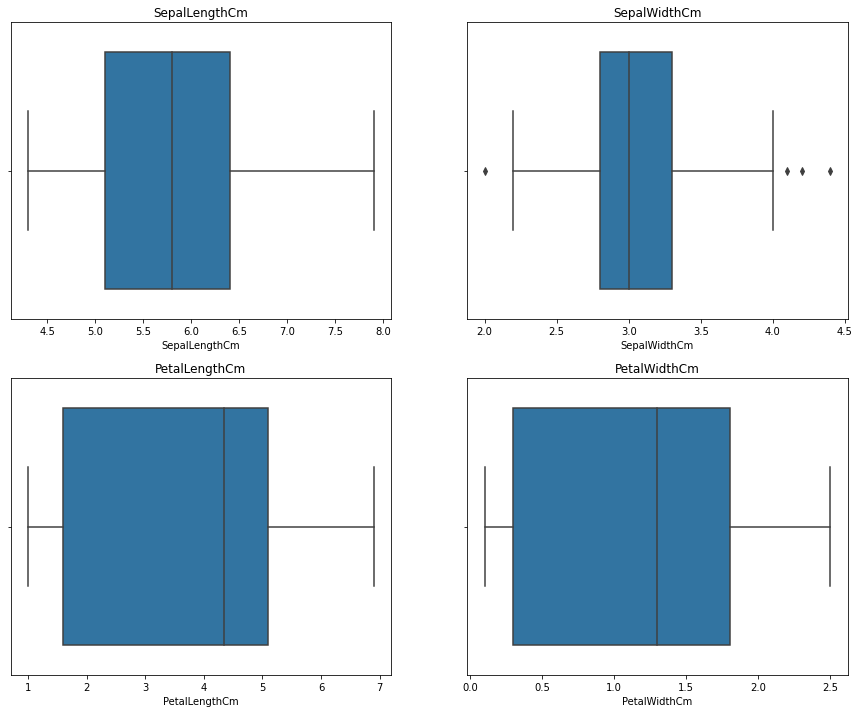

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['SepalLengthCm'])
plt.title("SepalLengthCm")

plt.subplot(2,2,2)
sns.boxplot(x=df['SepalWidthCm'])
plt.title("SepalWidthCm")


plt.subplot(2,2,3)
sns.boxplot(x=df['PetalLengthCm'])
plt.title("PetalLengthCm")


plt.subplot(2,2,4)
sns.boxplot(x=df['PetalWidthCm'])
plt.title("PetalWidthCm");

Podemos observar que o 'SepalWidthCm' possui alguns possiveis outliers. 

## Visualização dos dados

Confirmando a quantidade de cada espécie

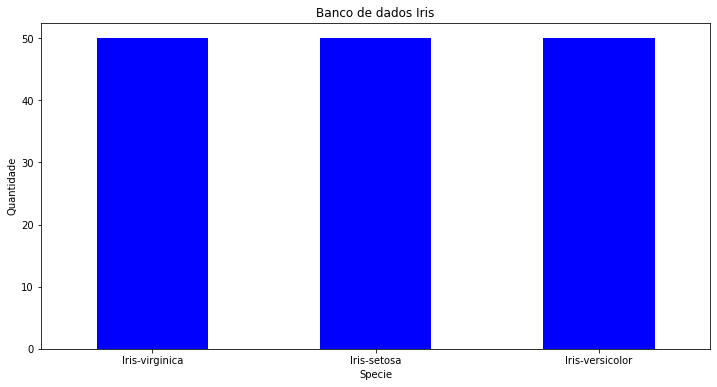

In [ ]:
# Visualizando a distribuição das Species num gráfico de barras

df['Species'].value_counts().head(10).plot(kind='bar', 
                                           figsize=(12,6),
                                           grid = False, 
                                           rot=0, 
                                           color="blue")

# Ajustando descrições
plt.title('Banco de dados Iris')
plt.xlabel('Specie')
plt.ylabel('Quantidade')
plt.show()

Visualizando como as medidas estão distribuídas com um histograma

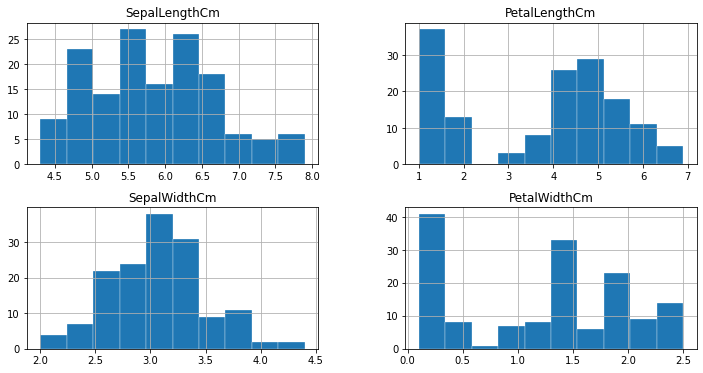

In [ ]:
# separando apenas as features

features = df[["SepalLengthCm", "PetalLengthCm",	"SepalWidthCm",		"PetalWidthCm"]]

features.hist(figsize=(12,6), edgecolor = 'white', linewidth=0.3)
plt.show()

Com este histograma da distribuição da quantidades de cada variável, pode-se perceber que pela escala que as Sépalas são normalmente maiores que as Pétalas

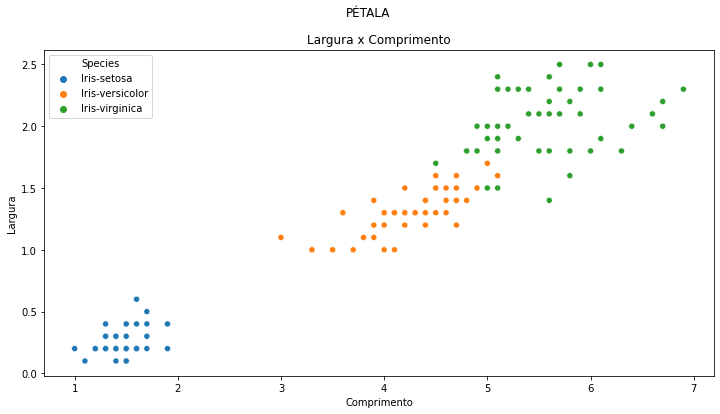

In [ ]:
# Gráfico de dispersão largura vs comprimento das pétalas

plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')
plt.title('Largura x Comprimento')
plt.suptitle('PÉTALA')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.show()

Percebe-se que as pétalas da espécie Virginica são predominantemente a maiores do que as outras duas. A Setosa é predominantemente menor.


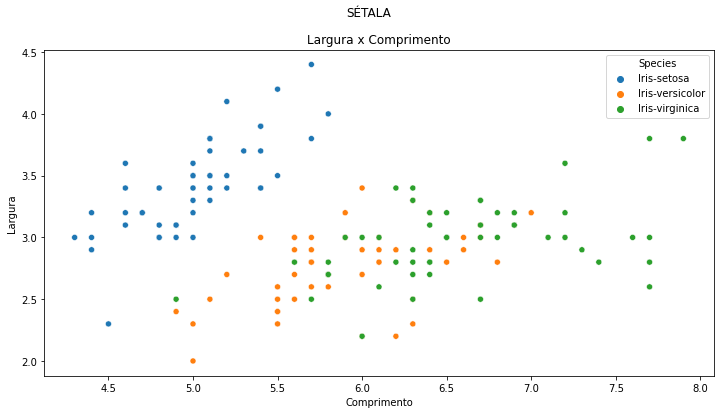

In [ ]:
# Gráfico de dispersão largura vs comprimento das Sépalas

plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')
plt.suptitle('SÉTALA')
plt.title('Largura x Comprimento')
plt.xlabel('Comprimento')
plt.ylabel('Largura')
plt.show()

Quando comparamos a Sépala, a Setosa tem maior comprimentor, enquanto a Virginica apresenta as maiores larguras.

Observa-se que as Sepalas possuem tamanhos mais dispersos.

observa-se que as petalas possuem tamanhos com crescimento linear

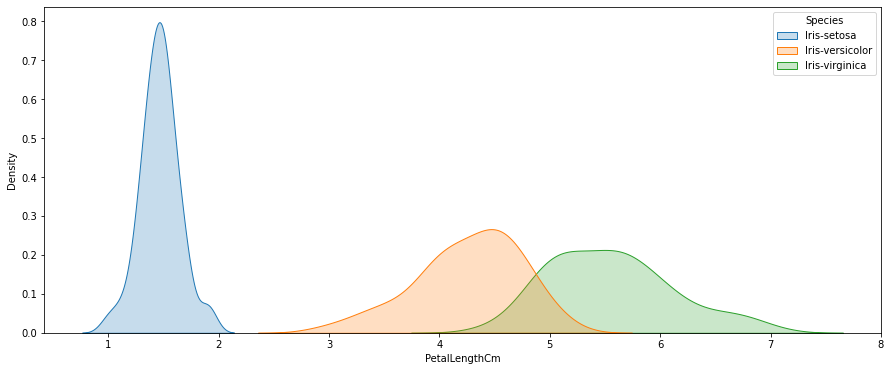

In [ ]:
# Visualizando a densidade de cada espécie 
# Para o comprimento das Petalas

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='PetalLengthCm', hue='Species',shade=True, color='b')

Observa-se que as do tipo setosa possuem petalas com comprimento em um intervalo de 1 a 2, sendo bem distintas das demais. 
Já as versicolor e virginica possuem valores proximos para a densidade, entre 0 e 0.3. 

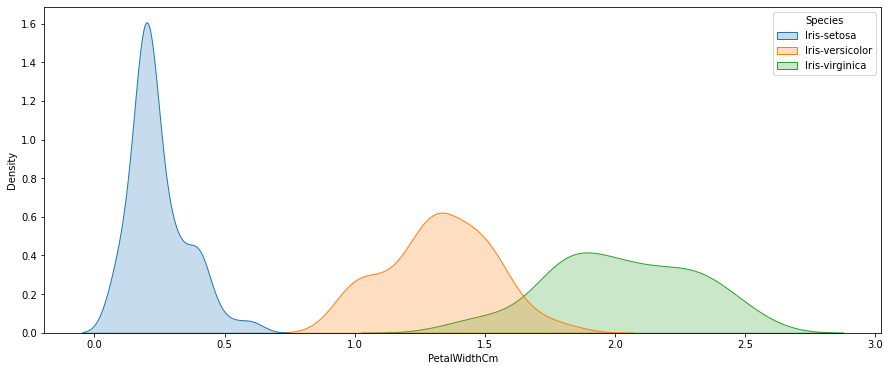

In [ ]:
# Visualizando a densidade de cada tipo 
# para a largura das Petalas

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='PetalWidthCm', hue='Species',shade=True, color='b')

Observa-se que novamente as do tipo setosa são menores e não possuem valores no mesmo intervalo que as versicolor e virginica.
Ainda, as do tipo versicolor e virginica possuem densidade relativamente no mesmo intervalo de 0 a 0.6

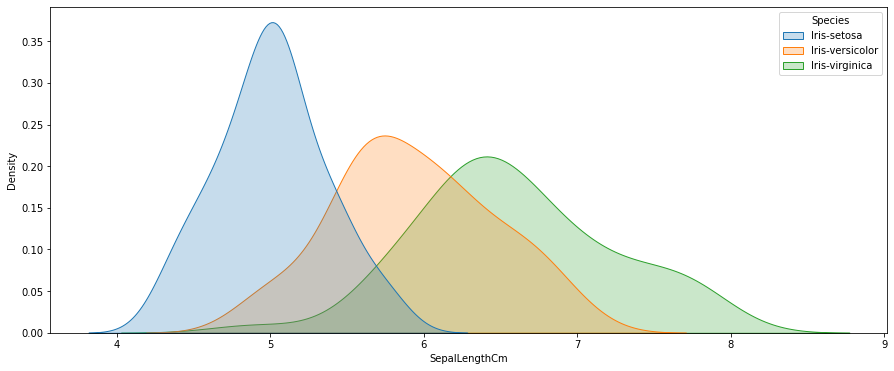

In [ ]:
#Visualizando a densidade de cada tipo: para o comprimento das Sepalas

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='SepalLengthCm', hue='Species',shade=True, color='b')

Observa-se que para as sepalas os tres tipo possuem interseção de valores para o comprimento. Ainda, o tipo setosa possui maiores valores para densidade e as do tipo versicolor e virginica possuem valores bem proximos. 

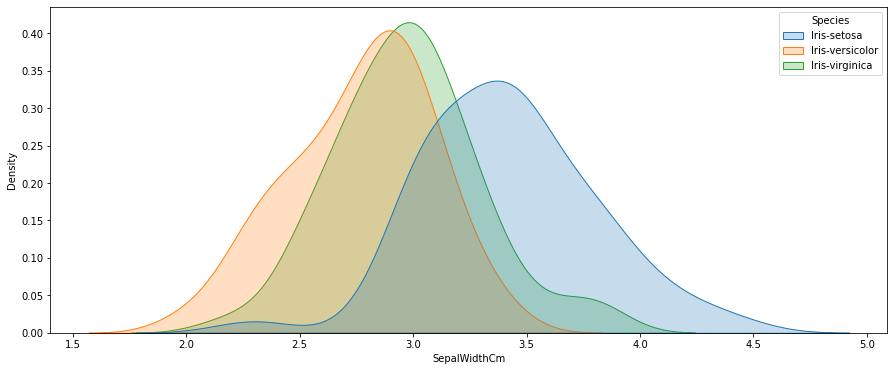

In [ ]:
#Visualizando a densidade de cada tipo:  para a largura das Sepalas

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=df, x='SepalWidthCm', hue='Species',shade=True, color='b')

Observa-se que os valores de largura para as sepalas são bastante parecidos. 

Com a analise dos graficos anteriores nos podemos tirar as seguintes conclusões:

Sepal:

- A "Iris-setosa" possui o menor comprimento, mas a maior largura.
- A "Iris-versicolor" possui um tamanho medio, só que mais proximo da "Iris-virginica"
- A "Iris-virginica" possui o maior comprimento.

Petal:

- A "Iris-setosa" parece ser a menor de todas as *species*
- A "Iris-versicolor" possui um tamanho medio, só que mais proximo da "Iris-virginica"
- A "Iris-virginica" parece possuir o maior tamanho.

Com base nisso, pode ser interessante criar colunas com a area da "Sepal" e da "Petal".

## Áreas 

Primeiro vamos aplicar o LabelEncoder na variavel especie para analisar depois a correlação.

In [ ]:
from sklearn import preprocessing

df_analise = df.copy()                                                           #Criar uma copia para não editar o original

label_encoder = preprocessing.LabelEncoder()

df_analise['Species'] = label_encoder.fit_transform(df_analise['Species'])

sp = label_encoder.classes_

In [ ]:
df_analise.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
# Criando variáveis de área para as sépalas e pétalas

df_analise["SepalAreaCm"] = df_analise['SepalLengthCm']*df_analise['SepalWidthCm']
df_analise["PetalAreaCm"] = df_analise['PetalLengthCm']*df_analise['PetalWidthCm']

df_analise.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreaCm,PetalAreaCm
0,1,5.1,3.5,1.4,0.2,0,17.85,0.28
1,2,4.9,3.0,1.4,0.2,0,14.70,0.28
2,3,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5,5.0,3.6,1.4,0.2,0,18.00,0.28


Vamos plotar a area para ver se conseguimos tirar alguma informação.

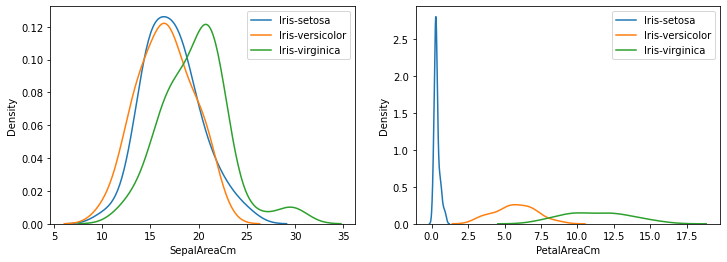

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.kdeplot(df_analise.loc[df_analise.Species == 0]['SepalAreaCm'], label='{}'.format(sp[0]))
sns.kdeplot(df_analise.loc[df_analise.Species == 1]['SepalAreaCm'], label='{}'.format(sp[1]))
sns.kdeplot(df_analise.loc[df_analise.Species == 2]['SepalAreaCm'], label='{}'.format(sp[2]))
plt.legend();

plt.subplot(1,2,2)
sns.kdeplot(df_analise.loc[df_analise.Species == 0]['PetalAreaCm'], label='{}'.format(sp[0]))
sns.kdeplot(df_analise.loc[df_analise.Species == 1]['PetalAreaCm'], label='{}'.format(sp[1]))
sns.kdeplot(df_analise.loc[df_analise.Species == 2]['PetalAreaCm'], label='{}'.format(sp[2]))
plt.legend();

## Correlação

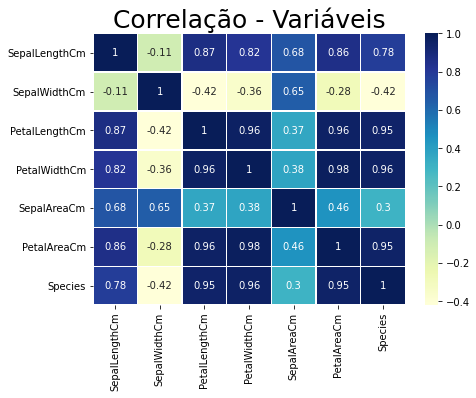

In [ ]:
atributos = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "SepalAreaCm", 'PetalAreaCm',"Species"]

plt.rcParams['figure.figsize'] = (7, 5) 
sns.heatmap(df_analise[atributos].corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlação - Variáveis', fontsize = 25)
plt.show()

A analise da matriz de correlação indica que a maioria das variaveis **correlação positiva alta** entre si. 

É importante observar isso com cuidado pois a alta correlação entre duas variaveis de entrada pode indicar que ambas estão representando o mesmo fenômeno.



---


Quanto **maior o comprimento da sépala**, menor a largura e maior o comprimento e largura da pétala

Quanto **maior o comprimento da pétala** maior a largura, maior o comprimento da pétala e menor a largura da pétala.


---






Por último vamos analisar a correlação das novas variaveis em relação a de saída.

In [ ]:
atributos = ['SepalLengthCm', 
             'SepalWidthCm', 
             'PetalLengthCm', 
             'PetalWidthCm', 
             'SepalAreaCm', 
             'PetalAreaCm', 
             'Species']
             
corr_m = df_analise[atributos].corr().abs()
corr_m["Species"].sort_values(ascending=False)

Species          1.000000
PetalWidthCm     0.956464
PetalAreaCm      0.950142
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm     0.419446
SepalAreaCm      0.301045
Name: Species, dtype: float64

Podemos ver que as colunas criadas possuem uma **correlação menor** com a variável resposta que as originais. 

Portanto, pode não ser interessante utilizá-las.


Outra coisa que fica mais fácil de notar aqui também é o modulo de correlação das *features* com o *label* (Species). 

Temos duas variáveis com correlação acima de 0.94. Isso pode indicar que temos boas variaveis para representar o fenômeno e que um modelo linear pode ser uma opção.

## Distribuição dos dados

Vamos plotar a distribuição dos dados, pois isso é importante para escolhermos a transformação de escala correta.

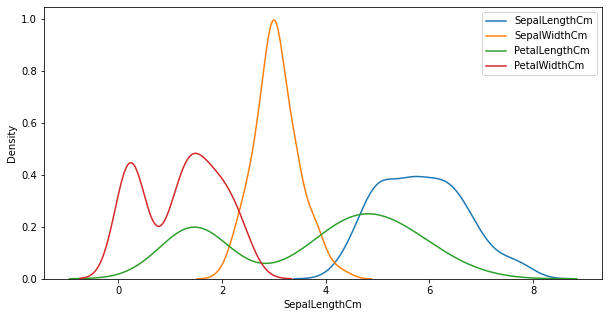

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['SepalLengthCm'], label='SepalLengthCm')
sns.kdeplot(df['SepalWidthCm'], label='SepalWidthCm')
sns.kdeplot(df['PetalLengthCm'], label='PetalLengthCm')
sns.kdeplot(df['PetalWidthCm'], label='PetalWidthCm')
plt.legend()
plt.show()

Podemos perceber que apenas a "SepalLengthCm" possui uma distribuição normal. 

Como o StandardScaler costuma ser mais indicado para variaveis com distribuição normal, podemos testar o MinMaxScaler na preparação dos dados.

# Preparando os dados para modelos de Aprendizado de Máquina

In [ ]:
df_preparado = df.copy()

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_preparado["Species"] = encoder.fit_transform(df_preparado["Species"])
df_preparado.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Transformando *label* em variável métrica.

0 = Iris-setosa

1 = Iris-versicolor

2 = Iris-virginica

## MinMaxScaler

Conforme afirmado na visualização da distribuição dos dados a MinMaxScaler foi escolhido para a reescala. No entanto, devido a todos os dados possuirem a mesma unidade de medida(centímentros), espera-se que a reescala não altere tanto o desempenho do modelo.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

atributos = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

scaler = MinMaxScaler()
df_preparado[atributos] = scaler.fit_transform(df_preparado[atributos])

In [ ]:
df_preparado.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,0
1,2,0.166667,0.416667,0.067797,0.041667,0
2,3,0.111111,0.500000,0.050847,0.041667,0
3,4,0.083333,0.458333,0.084746,0.041667,0
4,5,0.194444,0.666667,0.067797,0.041667,0


In [ ]:
df_preparado.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,0.666667,0.416667,0.711864,0.916667,2
146,147,0.555556,0.208333,0.677966,0.750000,2
147,148,0.611111,0.416667,0.711864,0.791667,2
148,149,0.527778,0.583333,0.745763,0.916667,2
149,150,0.444444,0.416667,0.694915,0.708333,2


In [ ]:
df_preparado.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,0.428704,0.439167,0.467571,0.457778,1.000000
std,43.445368,0.230018,0.180664,0.299054,0.317984,0.819232
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,0.222222,0.333333,0.101695,0.083333,0.000000
50%,75.500000,0.416667,0.416667,0.567797,0.500000,1.000000
75%,112.750000,0.583333,0.541667,0.694915,0.708333,2.000000
max,150.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Podemos perceber que a transformação ocorreu de maneira correta.

# Insights

Com base na visualização e exploração dos dados chegamos as seguintes conclusões:

- Podemos observar que o 'SepalWidthCm' possui algums possíveis outliers. Mas devido a pouca quantidade de dados é muito arriscado treinar os modelos sem essas instâncias
- Atraves do box plot foi possível encontrar alguns possiveis outliers, mas não tratamos isso pois é um dataset pequeno e remover instâncias pode prejudicar o desempenho.
- As variáveis de entrada possui muito correlação entre si o que indica que pode ter variáveis explicando o mesmo fenômeno, o que faz sentido já que estamos tratando de largura e comprimento de petalas e sepalas. Além disso, caso o modelo não tenha um bom desempenho é valido testar removendo uma das variáveis que tem correlação acima de 90% para ver se não esta confundindo o modelo.
- Outro fator observado é que as variaveis de entrada possui uma correlação muito alta com a de saída, dessa forma um modelo simples de regressao linear pode conseguir lidar com o problema.
- Sobre a distribuição dos dados apenas a "SepalLengthCm" possui uma distribuição normal. Então vale a pena utilizar o MinMaxScaler e não o StandardScaler pois o segundo é mais indicado para variáveis com distribuição normal. Apesar disso, por todas as variáveis possuirem a mesma unidade de medida pode ser que a reescala nao altere tanto o resultado.
- Ainda, observa-se que para as petalas existe um crescimento linear para os tamanhos, sendo as setosas as menores, as versicolor medias e as virginicas maiores.
- Em relação as sepalas, observa-se que as setosas possuem maior comprimento e menor largura, enquanto as virginica e versicolor, possuem valores em um mesmo intervalo, não possuindo padrão bem estabelecido. 

# Diferença entre estratégias de Reescala dos dados

### [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

O Normalize age reescalando os dados por observações e não por variáveis. O Normalizer levará em contas os atributos e reescalará os valores com base nesses valores. O Normalizer é uma boa escolha quando você sabe que a distribuição dos seus dados **não é normal/gaussiana** ou quando você não sabe qual é o tipo de distribuição dos seus dados.

### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

Seu diferencial se dá uma vez que este age sobre a coluna, ou seja, o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará entre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset). Importante ressaltar que essa técnica funciona melhor se a **distribuição dos dados não for normal** e se o **desvio padrão for pequeno**, além disso o MinMaxScaler **não reduz de forma eficaz o impacto de outliers** e também preserva a distribuição original. De forma simples o MinMaxScaler subtrai o valor em questão pelo menor valor da coluna e então divide pela diferença entre o valor máximo e mínimo:
valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Assim como o MinMaxScaler o StandardScaler age sobre as colunas, porém seu método é diferente uma vez que este subtrai do valor em questão a média da coluna e divide o resultado pelo desvio padrão. No final temos uma distribuição de dados com desvio padrão igual a 1 e variância de 1 também. Esse método trabalha melhor em **dados com distribuição normal** porém vale a tentativa para outros tipos de distribuições, além disso podemos deixar como dica que esse método resulta em ótimos frutos quando usado em conjunto com algoritmos como Linear Regression e Logistic Regression.
valor = (valor — média) / desvioPadão

### [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

Também atua sobre as colunas e o diferencial deste método é a **combinação com o uso de quartis** o que nos garante um bom tratamento dos outliers. Em seu método o RobustScaler subtrai a média do valor em questão e então divide o resultado pelo segundo quartil. Importante notar que os outliers ainda estão presentes porém estão representados dentro de uma escala em que o seu impacto negativo é reduzido.

### [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

Este método transforma os valores de tal forma que a distribuição tende a se aproximar de uma distribuição normal. Uma observação importante é que essa tranformação pode distorcer as correlações lineares entre as colunas. Neste método todos os valores serão reescalados em um intervalo de 0 a 1 de tal forma que os outliers não poderão mais ser distinguidos logo ao contrário do RobustScaler o impacto da ação em cima dos outilers será grande.

### [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

Atua sobre as colunas e assim como o Quantile procura transformar os valores em uma distribuição mais normal, sendo indicado em situações onde uma distribuição normal é desejada para os dados, além disso esse método ainda suporta os métodos de transformação Box-Cox (dataset com dados positivos) e Yeo-Johnson (dataset com dados positivos e negativos).

## Quadros resumos

![](https://miro.medium.com/max/700/1*Ndc_qXaY40p5yIBCb8fLPw.png)

![](https://miro.medium.com/max/679/1*wWQHfW7QPPCP2O_xW_6tMA.png)

[Fonte](https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1)

# Modelos de ML

In [32]:
# Copiando banco para dois modelos diferentes

df_copia = df.copy()


Creating Models

In [33]:
# Dividindo features de label para o modelos KNN e LR

X = df_copia.iloc[:,1:5]
y = df_copia.iloc[:,5:]

In [34]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y.head()


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [36]:
# Dividindo o conjunto de dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

In [38]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
113,5.7,2.5,5.0,2.0
131,7.9,3.8,6.4,2.0
25,5.0,3.0,1.6,0.2
8,4.4,2.9,1.4,0.2
62,6.0,2.2,4.0,1.0


In [39]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
29,4.7,3.2,1.6,0.2
27,5.2,3.5,1.5,0.2
141,6.9,3.1,5.1,2.3
65,6.7,3.1,4.4,1.4


In [40]:
y_train.head()

,Species
113,Iris-virginica
131,Iris-virginica
25,Iris-setosa
8,Iris-setosa
62,Iris-versicolor


In [41]:
y_test.head()

,Species
4,Iris-setosa
29,Iris-setosa
27,Iris-setosa
141,Iris-virginica
65,Iris-versicolor


# KNN (K Neighbors Classifier)

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Algoritmo KNN

É um algoritmo que pode ser usado tanto para classificação como regressão.

Seu objetivo é determinar a qual grupo uma determinada amostra vai pertencer com base nas amostras vizinhas.

Os exemplos de treinamento são armazenados e a previsão é feita somente quando um novo registro precisa ser classificado.

Ao contrário dos outros algoritmos ele não constrói um modelo, ele faz somente o cálculo da distância (distância Euclidiana, etc). Por conta dessa característica, ele é considerado um método do tipo preguiçoso (lazy).


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric = 'minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [43]:
# pontuação de precisão

from sklearn.metrics import accuracy_score

accuracy_score_knn = accuracy_score(y_test,y_pred,3)

print("ACURÁCIA DO MODELO KNN\n")
print(f"{accuracy_score_knn * 100} %")

ACURÁCIA DO MODELO KNN

98.0 %


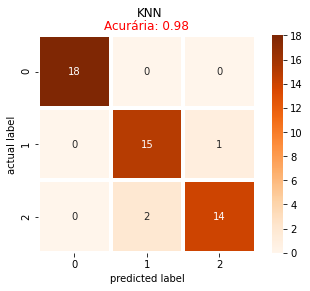

In [68]:
# avaliando modelo

from sklearn.metrics import classification_report, confusion_matrix

# Imprimindo a matriz confusa

cm_knn = confusion_matrix(y_test, y_pred)
 
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Oranges',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.suptitle("KNN")
plt.title(f'Acurária: {accuracy_score_knn}',size=12,color='red')
plt.show()

In [50]:
# Imprimindo o relatório de classificação

print("RELATÓRIO DE CLASSIFICAÇÃO: \n")

print(classification_report(y_test, y_pred)) 

RELATÓRIO DE CLASSIFICAÇÃO: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



**recall** responde qual proporção de positivos foi identificados corretamente;

**precisão** - Qual a proporção de identificações positivas foi realmente correta? 

**f-score** nos mostra o balanço entre a precisão e o recall de nosso modelo. Sua fórmula é:

```
2 * (precision * recall / precision + recall)
```

## Otimizando o parâmetro k utilizando o GridSearch:

In [52]:
from sklearn.model_selection import GridSearchCV

Vamos gerar uma lista com valores de 1 a 30 para testar qual será o melhor valor para o parâmetro K.

In [53]:
# Definindo a lista de valores.

k_list = list(range(1,41))

In [54]:
# Colocamos os valores em um dicionário

parametros = dict(n_neighbors=k_list)

In [55]:
# Instanciando o objeto GridSearch:

grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

No código acima passamos o nosso modelo, a lista com os valores para o número de vizinhos, cv (número de dobras para a validação cruzada) e o scoring que é uma das métricas de avaliação dos modelos de classificação.

[Documentação do Sklearn](https://scikit-learn.org/stable/modules/cross_validation.html) para mais detalhes sobre a validação cruzada.



In [56]:
# Treinando o objeto

grid.fit(df.drop('Species',axis=1),df['Species'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Mais afinal qual é o melhor valor para o parâmetro K?

In [57]:
print(f"Melhores parametros {grid.best_params_} com o valor de acurácia {grid.best_score_} ")

Melhores parametros {'n_neighbors': 2} com o valor de acurácia 0.8799999999999999 


____

# Logistic Regression

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Comumente utilizada para estimar a probabilidade de uma instãncia pertencer a uma determinada classe. Se a probabilidade for maior que certa porcentagem, então o modelo prevê  que a instância pertence a essa classe (chamada de classe positiva), ou

In [58]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=8)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
# Avaliando modelo

# Pontuação de precisão

accuracy_score_logr = accuracy_score(y_test,y_pred,3)

print("ACURÁCIA DO MODELO REGRESSÃO LOGÍSTICA\n")
print(f"{accuracy_score_logr * 100} %")


ACURÁCIA DO MODELO REGRESSÃO LOGÍSTICA

94.0 %


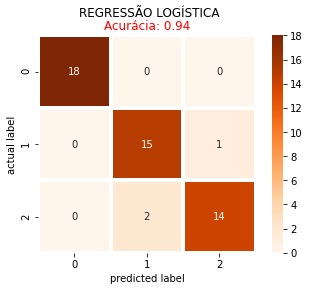

In [69]:
# matriz confusa

cm_logr = confusion_matrix(y_test,y_pred)

sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Oranges',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.suptitle("REGRESSÃO LOGÍSTICA")
plt.title(f'Acurácia: {accuracy_score_logr}',size=12,color='red')
plt.show()

In [70]:
# Relatório de classificação

print("REGRESSÃO LOGÍSTICA\n")
print("Relatório de classificação: \n")

print(classification_report(y_test, y_pred))

REGRESSÃO LOGÍSTICA

Relatório de classificação: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



Acurária do Modelo de Regressão Logistica com dataset redimensionamento foi igual a 86.0 % 

# Conclusão

O modelo KNN com dataset original é a melhor escolha testada.